<div class="alert alert-block alert-success">
<b>Overall reviewer's comment.V.2.</b> <a class="tocSkip"></a>

Breeanna, thank you for your corrections! Everything is good!
    
Congratulations on your accomplishment! Each project you complete adds to your growing expertise, and it’s exciting to see you make such great strides. Keep up the great work! 🎯
    
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Breeanna, thank you for sending your project. You've done a really good job on it! You write a clear code, and plot a good graphs.
   
    
<span class="text-danger">There are few things that need to be corrected in your project. They're mostly minor issues that are easy to fix. Could you check my comments?  Do not hesitate to ask your tutor for help, if you have any problems!</span>
    
    
Waiting for the new version!
    
</div>

Please find my comments below—**I kindly ask that you do not move, modify, or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.

</div>

You can answer me by using this: 

<div class="alert alert-block alert-info">
<b>Student answer</b> <a class="tocSkip"></a>

</div>


# Course Project 6: Exploratory data analysis (Python)

### Introduction: 
 Below we will explore data for Zuber, a new ride-sharing company entering the Chicago market. Our goal is to gain insights into passenger behavior and preferences while examining the influence of external factors, such as weather, on ride patterns. By understanding these dynamics, we aim to provide actionable recommendations to enhance Zuber's service offerings and customer satisfaction in this competitive landscape.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

cab_data = pd.read_csv('/datasets/project_sql_result_01.csv')
ride_data = pd.read_csv('/datasets/project_sql_result_04.csv')

In [2]:
cab_data.info()

display(cab_data.sample(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
45,3011 - 66308 JBL Cab Inc.,25
58,5062 - 34841 Sam Mestas,8
49,5074 - 54002 Ahzmi Inc,16
48,3623 - 72222 Arrington Enterprises,20
6,City Service,8448


In [3]:
ride_data.info()

display(ride_data.sample(n=5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
60,New City,22.933333
6,Grant Park,2068.533333
65,Ashburn,16.133333
37,Bridgeport,77.100000
36,Kenwood,89.366667


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good start with the title and files.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Also, we should add an introduction.
</div>

## First Thoughts of cab_data and ride_data

### cab_data:
-  Column 'company_name' is cateogrical and 'trips_amount' is numerical. Both columns contain no missing values.
-  I will clean and standardize the data. Look for outliers.
- Add additional columns such as rank, percentage, and category to more easily differentiate the data. 

In [4]:
cab_data['company_name'] = cab_data['company_name'].str.strip()


In [5]:
cab_data = cab_data.groupby('company_name', as_index=False).sum()


In [6]:
cab_data['trips_amount'].describe()


count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

In [7]:
conditions = [
    cab_data['trips_amount'] > 5000,
    cab_data['trips_amount'].between(1000, 5000),
    cab_data['trips_amount'] < 1000
]
labels = ['High', 'Medium', 'Low']
cab_data['category'] = np.select(conditions, labels)


In [8]:
cab_data = cab_data.sort_values(by='trips_amount', ascending=False)

In [9]:
cab_data['rank'] = cab_data['trips_amount'].rank(ascending=False)


In [10]:
cab_data.isnull().sum()


company_name    0
trips_amount    0
category        0
rank            0
dtype: int64

In [11]:
print(cab_data.sample(n=10))

                      company_name  trips_amount category  rank
39    Chicago Medallion Management          1955   Medium  18.0
2           1469 - 64126 Omar Jada            36      Low  38.0
50               Medallion Leasing         10367     High   3.0
49                  Leonard Cab Co           147      Low  33.0
22         5062 - 34841 Sam Mestas             8      Low  59.0
5       2241 - 44667 - Felman Corp             3      Low  63.0
57                      Setare Inc           230      Low  31.0
48           KOAM Taxi Association          1259   Medium  24.0
4        2192 - 73487 Zeymane Corp            14      Low  54.0
8   2809 - 95474 C & D Cab Co Inc.            29      Low  43.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great that we checked dataset.</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Why we need new columns and changes? Are you sure? Please do not forget to check missing values and write a conclusion about this part. </div>

<div class="alert alert-block alert-info">
<b>Per info() there does not appear to be missing values and this is why I did not check for missing values. Is this not correct? I dropped 'percentage' to keep from redundancy from the 'rank' column. Please let me know if adding columns is not recommended. I thought it would help to enhance the data.</b> <a class="tocSkip"></a>

</div>


<div class="alert alert-block alert-warning">
<b>Reviewer's comment. V.2. </b> <a class="tocSkip"></a>

Info is for info. It not missing values checking. We can have in info values like: 98346688 and 98946638. It is hard to see the difference. We need to use isnull() for checking, it help us to avoid mistackes. 
</div>

**cab_data: I added the column 'category' to group the companies with Low, Medium, and High trip volumnes. I added the column 'rank' to help quickly idenify the companies with the lowest and highest trip count.**

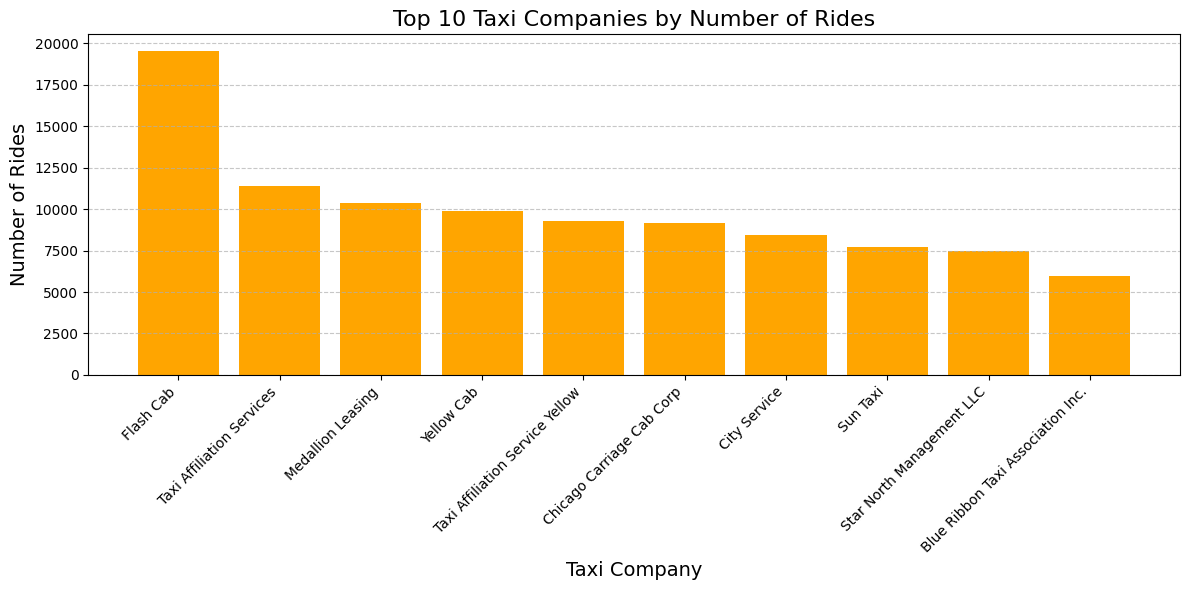

In [12]:
top_cab_companies = cab_data.sort_values(by='trips_amount', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_cab_companies['company_name'], top_cab_companies['trips_amount'], color='orange')
plt.title('Top 10 Taxi Companies by Number of Rides', fontsize=16)
plt.xlabel('Taxi Company', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

-   Flash Cab almost has double the amount of rides as it's next closest competitor. Besides Flash Cab, the other taxi companies in the top 10 have similar ride numbers. the data. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2.</b> <a class="tocSkip"></a>

Very good! Yes, Flash cab is a best here. Perhaps, because of Flash or number of trips. :)
</div>

### ride_data:
-  Column 'dropoff_location_name' is cateogrical and 'average_trips' is numerical (float). Both columns contain no missing vaules.
-  I will clean and standardize the data. Look for outliers.
-  Add additional columns to give more comprehensive view of the data.

In [13]:
ride_data['dropoff_location_name'] = ride_data['dropoff_location_name'].str.strip()


In [14]:
ride_data = ride_data.groupby('dropoff_location_name', as_index=False).mean()


In [15]:
ride_data['average_trips'].describe()


count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

In [16]:
conditions = [
    ride_data['average_trips'] > 300,
    ride_data['average_trips'].between(100, 300),
    ride_data['average_trips'] < 100
]
labels = ['High', 'Medium', 'Low']
ride_data['category'] = np.select(conditions, labels)


In [17]:
ride_data = ride_data.sort_values(by='average_trips', ascending=False)


In [18]:
ride_data['rank'] = ride_data['average_trips'].rank(ascending=False)


In [19]:
print(ride_data.sample(n=10))

    dropoff_location_name  average_trips category  rank
32             Gold Coast    1364.233333     High   9.0
63                 O'Hare    2546.900000     High   5.0
33        Grand Boulevard      51.600000      Low  48.0
93           Wrigleyville      14.233333      Low  71.0
81          United Center     178.900000   Medium  31.0
37                Hermosa      27.566667      Low  58.0
41           Jackson Park      33.103448      Low  54.0
73  Sauganash,Forest Glen      43.566667      Low  50.0
51        Lower West Side     143.300000   Medium  32.0
79      Ukrainian Village      27.600000      Low  57.0




<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

The same here. Checking is good. But why we need new columns and changes? Are you sure? Please do not forget to check missing values and write a conclusion about this part. </div>

**ride_data: I added the column 'category' to group the the areas into Low, Medium, and High trip volumes. I added the column 'rank' to help quickly identify the neighborhoods with the lowest and highest trip averages.** 

In [20]:
top_neighborhoods = ride_data.sort_values(by='average_trips', ascending=False).head(10)

print(top_neighborhoods)

   dropoff_location_name  average_trips category  rank
50                  Loop   10727.466667     High   1.0
68           River North    9523.666667     High   2.0
78         Streeterville    6664.666667     High   3.0
87             West Loop    5163.666667     High   4.0
63                O'Hare    2546.900000     High   5.0
44             Lake View    2420.966667     High   6.0
35            Grant Park    2068.533333     High   7.0
56         Museum Campus    1510.000000     High   8.0
32            Gold Coast    1364.233333     High   9.0
74    Sheffield & DePaul    1259.766667     High  10.0


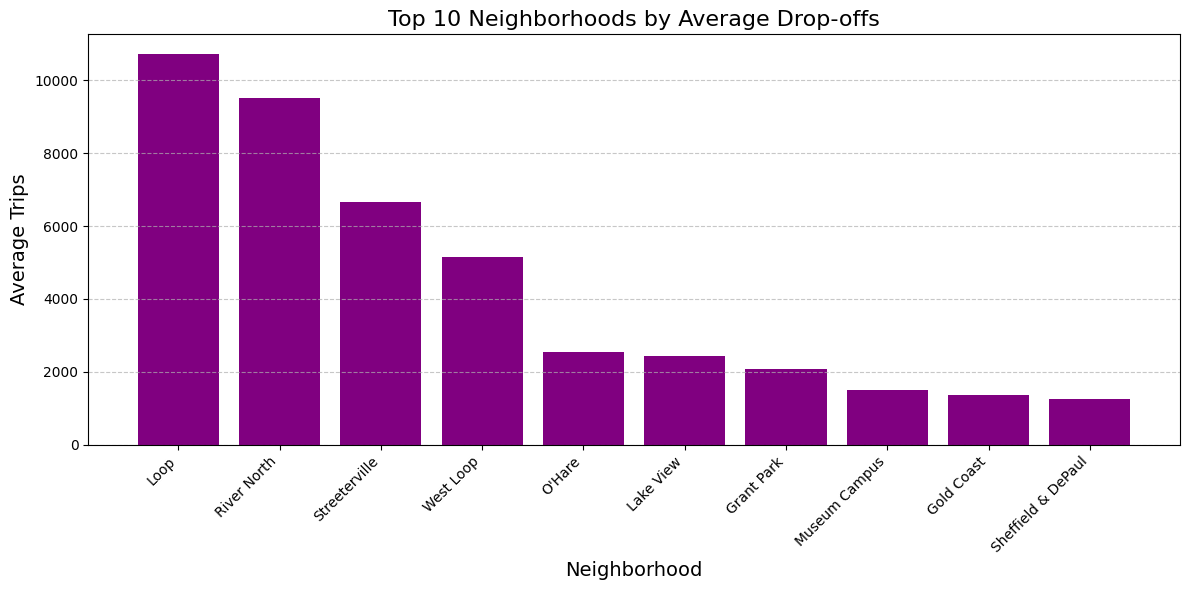

In [21]:
top_neighborhoods = ride_data.sort_values(by='average_trips', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_neighborhoods['dropoff_location_name'], top_neighborhoods['average_trips'], color='purple')
plt.title('Top 10 Neighborhoods by Average Drop-offs', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Average Trips', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

-  Loop, River North, Streetville, and West Loop have significantly more drop offs compared to the other needihoods in the top 10.  

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! Good locations = more popularity!
    
</div>

# Testing hypotheses (Python)

In [22]:
airport_ride_data = pd.read_csv('/datasets/project_sql_result_07.csv')

display(airport_ride_data.sample(n=5))

,start_ts,weather_conditions,duration_seconds
739,2017-11-04 19:00:00,Good,2460.0
603,2017-11-11 08:00:00,Good,1140.0
0,2017-11-25 16:00:00,Good,2410.0
938,2017-11-04 04:00:00,Good,1341.0
634,2017-11-04 06:00:00,Good,1260.0


In [23]:
airport_ride_data['start_ts'] = pd.to_datetime(airport_ride_data['start_ts'], errors='coerce')

missing_values = airport_ride_data[['start_ts', 'weather_conditions', 'duration_seconds']].isnull().sum()
print("Missing values:\n", missing_values)

airport_ride_data.dropna(subset=['start_ts', 'weather_conditions', 'duration_seconds'], inplace=True)

airport_ride_data['day_of_week'] = airport_ride_data['start_ts'].dt.day_name()

saturdays_data = airport_ride_data[airport_ride_data['day_of_week'] == 'Saturday']

rainy_saturdays = saturdays_data[saturdays_data['weather_conditions'] == 'Bad']['duration_seconds']
non_rainy_saturdays = saturdays_data[saturdays_data['weather_conditions'] != 'Bad']['duration_seconds']

if len(rainy_saturdays) > 0 and len(non_rainy_saturdays) > 0:
    if len(rainy_saturdays) >= 3 and len(non_rainy_saturdays) >= 3:
       
        rainy_normal = shapiro(rainy_saturdays).pvalue > 0.05
        non_rainy_normal = shapiro(non_rainy_saturdays).pvalue > 0.05
    else:
        rainy_normal = False
        non_rainy_normal = False

    if rainy_normal and non_rainy_normal:
        stat, p_value = ttest_ind(rainy_saturdays, non_rainy_saturdays, equal_var=False)
        test_used = "t-test"
    else:
        stat, p_value = mannwhitneyu(rainy_saturdays, non_rainy_saturdays, alternative='two-sided')
        test_used = "Mann-Whitney U test"

    print(f"\nTest used: {test_used}")
    print(f"Test statistic: {stat:.3f}")
    print(f"P-value: {p_value:.3e}")  

    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference in ride duration.")
    else:
        print("Fail to reject the null hypothesis: No significant difference in ride duration.")
else:
    print("One or both datasets are empty. Unable to perform hypothesis testing.")


Missing values:
 start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Test used: Mann-Whitney U test
Test statistic: 108193.500
P-value: 6.717e-14
Reject the null hypothesis: There is a significant difference in ride duration.


**The analysis shows that there are no missing values in the key columns (start_ts, weather_conditions, and duration_seconds), ensuring the dataset is complete and reliable for hypothesis testing.**

**Since the p-value is significantly less than the alpha level of 0.05, we reject the null hypothesis. This result provides strong evidence that there is a statistically significant difference in ride durations between rainy and non-rainy Saturdays.**

<div class="alert alert-block alert-danger">
<s><b>Reviewer's comment</b> <a class="tocSkip"></a>

You are on the right way! Please:
    
1) Check missing valies and datsets
2) Use ttest for this part. Please be sure that pvalue is not 0.
3) Write a conclusion about this part
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2. </b> <a class="tocSkip"></a>

Great, we choosed correct alpha and test.

Very good that we checked results by test, it gives us the total picture.</div>

### Conclusion: 
Weather significantly impacts ride duration, with rainy conditions contributing to slower traffic, reduced visibility, and more cautious driving. Taxi companies, such as Zuber, should anticipate these delays and consider deploying additional drivers during rainy weather to meet increased demand and minimize wait times. Customers should also be encouraged to plan their trips earlier to account for potential delays. Proactively communicating expected delays to customers during adverse weather can help manage expectations, reduce dissatisfaction, and enhance the overall service experience. By addressing these factors, Zuber can position itself as a reliable and customer-focused option in the competitive Chicago market.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Please add more details about whole project    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment. V.2. </b> <a class="tocSkip"></a>

Thank you!</div>